# WeatherPy

### Analysis

-  As expected , temperatures are higher closer to equator
-  No significant relation exists between latitude and humidity/windspeed/cloudiness
-  Majortity of cities have windspeeds lower than 15mph and humidity greater than 50%. More data is needed to arrive at a more definite relationship, if any

In [1]:
# Dependencies
import random
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import openweathermapy as ow
from citipy import citipy
from datetime import datetime
import urllib.response

# import api_key from config file
from config import api_key

Plothole#1: Since the assignment specifically instructed to use citipy, the approach is more convoluted than it should be. A more straight forward approach would have been taking the openweather map database of cities list and (if required, split them to multiple samples and) randomly picking 500 cities from the list and plotting them

Plothole#2: Citipy generates quite a few number of cities that are not present in openweathermap database. so instead, using only those cities, randomly generated by citipy, but only if present in owm improves the api usage efficiency and reduces the 
number of wasted api calls

In [2]:
now = datetime.now().strftime("%d/%m/%Y")
#load the list of cities from owm database
with open('city.list.json', 'r', encoding="utf-8") as f:
    array = json.load(f)

In [3]:
owmcity = []
for response in array:
    owmcity.append(response["name"].lower()+","+response["country"])

### Generate Cities list

Randomly generate 510 cities from citipy. Run the loop till all the duplicates are dropped
and only unique values remain (which are also present in the owm database)

P.S: 510(instead of 500) cities were chosen to account for those few cities that are present in the owm database list but
the api call fails with "not found" error.

In [4]:
unique_cities = pd.DataFrame()
settings = {"units": "imperial", "appid": api_key}
columnnames = ["City","Country","Input Lat","Input Long"]

while (len(unique_cities.index)<510):
    city_row = []
    for i in range(510-len(unique_cities.index)):
        input_latitude = random.uniform(-90, 90)
        input_longitude = random.uniform(-180, 180)
        city = citipy.nearest_city(input_latitude,input_longitude)
        fullcity = city.city_name.lower()+","+city.country_code.upper()
        
        #use the city returned only if it's present in owmap database
        if fullcity in owmcity: 
            city_row.append([city.city_name.capitalize(),city.country_code.upper(),input_latitude,input_longitude])
            
    cities_df = pd.DataFrame(city_row,columns = columnnames)
    unique_cities = unique_cities.append(cities_df,ignore_index=True)
    unique_cities = unique_cities.drop_duplicates(subset=['City', 'Country'])
    unique_cities = unique_cities.reset_index(drop=True)

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
weather_data = []
data = []
cities = unique_cities["City"]+","+unique_cities["Country"]

### Perform API Calls

In [6]:
#Make the API Calls using the owmpy wrapper
print("Beginning Data Retrieval")
print("-"*27)
counter = 1
for city in cities:
    print(f"Processing Record {counter} of {len(unique_cities.index)} | {city}")
    print(f"{url}appid={api_key}&q={city}&units={settings['units']}")
    try:
        weather_data.append(ow.get_current(city, **settings))
    except urllib.error.HTTPError as y:
        if (y.code == 404):
            print(city+" is not found in OpenWeatherMap Database")
        else:
            print("Something is wrong with "+city+"." + y)
    except Exception as x:
        print("Error encountered when processing "+city)
        print(x)
    counter+=1
print(str(counter-1)+" Cities Queried")
print(str(len(weather_data))+" Cities Found and Retreived")

Beginning Data Retrieval
---------------------------
Processing Record 1 of 510 | Moerai,PF
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Moerai,PF&units=imperial
Processing Record 2 of 510 | Butaritari,KI
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Butaritari,KI&units=imperial
Processing Record 3 of 510 | Svetlogorsk,RU
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Svetlogorsk,RU&units=imperial
Processing Record 4 of 510 | Harper,LR
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Harper,LR&units=imperial
Processing Record 5 of 510 | Maniitsoq,GL
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Maniitsoq,GL&units=imperial
Processing Record 6 of 510 | Coquimbo,CL
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Coquimbo,CL&units=imperial
Process

Processing Record 53 of 510 | Saldanha,ZA
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Saldanha,ZA&units=imperial
Processing Record 54 of 510 | Carsamba,TR
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Carsamba,TR&units=imperial
Processing Record 55 of 510 | Adamas,GR
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Adamas,GR&units=imperial
Processing Record 56 of 510 | Jumla,NP
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Jumla,NP&units=imperial
Processing Record 57 of 510 | New norfolk,AU
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=New norfolk,AU&units=imperial
Processing Record 58 of 510 | Kamina,CD
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Kamina,CD&units=imperial
Processing Record 59 of 510 | Puerto montt,CL
http://api.openweath

Processing Record 105 of 510 | Bredasdorp,ZA
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Bredasdorp,ZA&units=imperial
Processing Record 106 of 510 | Puerto ayora,EC
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Puerto ayora,EC&units=imperial
Processing Record 107 of 510 | Severo-kurilsk,RU
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Severo-kurilsk,RU&units=imperial
Processing Record 108 of 510 | Dunedin,NZ
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Dunedin,NZ&units=imperial
Processing Record 109 of 510 | Weymouth,GB
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Weymouth,GB&units=imperial
Processing Record 110 of 510 | Sainte-maxime,FR
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Sainte-maxime,FR&units=imperial
Processing Record 11

Processing Record 157 of 510 | Port blair,IN
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Port blair,IN&units=imperial
Processing Record 158 of 510 | Huanren,CN
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Huanren,CN&units=imperial
Processing Record 159 of 510 | Husavik,IS
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Husavik,IS&units=imperial
Processing Record 160 of 510 | Port macquarie,AU
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Port macquarie,AU&units=imperial
Processing Record 161 of 510 | Batticaloa,LK
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Batticaloa,LK&units=imperial
Processing Record 162 of 510 | Jacmel,HT
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Jacmel,HT&units=imperial
Processing Record 163 of 510 | Weyburn,C

Processing Record 210 of 510 | Fuzhou,CN
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Fuzhou,CN&units=imperial
Processing Record 211 of 510 | Luba,GQ
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Luba,GQ&units=imperial
Processing Record 212 of 510 | Cabo san lucas,MX
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Cabo san lucas,MX&units=imperial
Processing Record 213 of 510 | Tuatapere,NZ
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Tuatapere,NZ&units=imperial
Processing Record 214 of 510 | Sitka,US
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Sitka,US&units=imperial
Processing Record 215 of 510 | Beloha,MG
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Beloha,MG&units=imperial
Processing Record 216 of 510 | Melfi,TD
http://api.openweath

Processing Record 262 of 510 | Zhangye,CN
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Zhangye,CN&units=imperial
Processing Record 263 of 510 | Khanpur,PK
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Khanpur,PK&units=imperial
Processing Record 264 of 510 | Orel-izumrud,RU
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Orel-izumrud,RU&units=imperial
Processing Record 265 of 510 | Rochester,US
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Rochester,US&units=imperial
Processing Record 266 of 510 | Elizabeth city,US
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Elizabeth city,US&units=imperial
Processing Record 267 of 510 | Saint-joseph,RE
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Saint-joseph,RE&units=imperial
Processing Record 268 of 5

Processing Record 313 of 510 | Narsaq,GL
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Narsaq,GL&units=imperial
Processing Record 314 of 510 | Pictou,CA
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Pictou,CA&units=imperial
Processing Record 315 of 510 | Makarov,RU
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Makarov,RU&units=imperial
Processing Record 316 of 510 | Ola,RU
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Ola,RU&units=imperial
Processing Record 317 of 510 | Urubicha,BO
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Urubicha,BO&units=imperial
Processing Record 318 of 510 | Lodwar,KE
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Lodwar,KE&units=imperial
Processing Record 319 of 510 | Sinor,IN
http://api.openweathermap.org/data/2

Processing Record 365 of 510 | Santa teresa,NI
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Santa teresa,NI&units=imperial
Processing Record 366 of 510 | Geraldton,AU
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Geraldton,AU&units=imperial
Processing Record 367 of 510 | Havre,US
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Havre,US&units=imperial
Processing Record 368 of 510 | Loudi,CN
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Loudi,CN&units=imperial
Processing Record 369 of 510 | Ozernovskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Ozernovskiy,RU&units=imperial
Processing Record 370 of 510 | Puerto escondido,MX
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Puerto escondido,MX&units=imperial
Processing Record 371 of 510 | S

Processing Record 418 of 510 | Zelenoborsk,RU
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Zelenoborsk,RU&units=imperial
Processing Record 419 of 510 | Chicama,PE
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Chicama,PE&units=imperial
Processing Record 420 of 510 | Bambous virieux,MU
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Bambous virieux,MU&units=imperial
Processing Record 421 of 510 | Flagstaff,US
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Flagstaff,US&units=imperial
Processing Record 422 of 510 | Abu dhabi,AE
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Abu dhabi,AE&units=imperial
Processing Record 423 of 510 | Lamesa,US
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Lamesa,US&units=imperial
Processing Record 424 of 510 | Lee

Processing Record 470 of 510 | Mulanje,MW
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Mulanje,MW&units=imperial
Processing Record 471 of 510 | Ahipara,NZ
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Ahipara,NZ&units=imperial
Processing Record 472 of 510 | Sao borja,BR
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Sao borja,BR&units=imperial
Processing Record 473 of 510 | Marsh harbour,BS
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Marsh harbour,BS&units=imperial
Processing Record 474 of 510 | Griffith,AU
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Griffith,AU&units=imperial
Processing Record 475 of 510 | Turiacu,BR
http://api.openweathermap.org/data/2.5/weather?appid=747defe6059e69d3bdfce6c2c60e918e&q=Turiacu,BR&units=imperial
Processing Record 476 of 510 | San ferdinando 

In [7]:
summary = ["name","sys.country","main.temp_max","coord.lat", "coord.lon","main.humidity", "wind.speed","clouds.all"]
data = [response(*summary) for response in weather_data]

column_names = ["City","Country","Temperature", "Latitude", "Longitude","Humidity","WindSpeed","Cloudiness"]
weather_data = pd.DataFrame(data,columns=column_names)

weather_data.to_csv("weather_data.csv", encoding='utf-8', index=False)

### Temperature - Latitude Plot

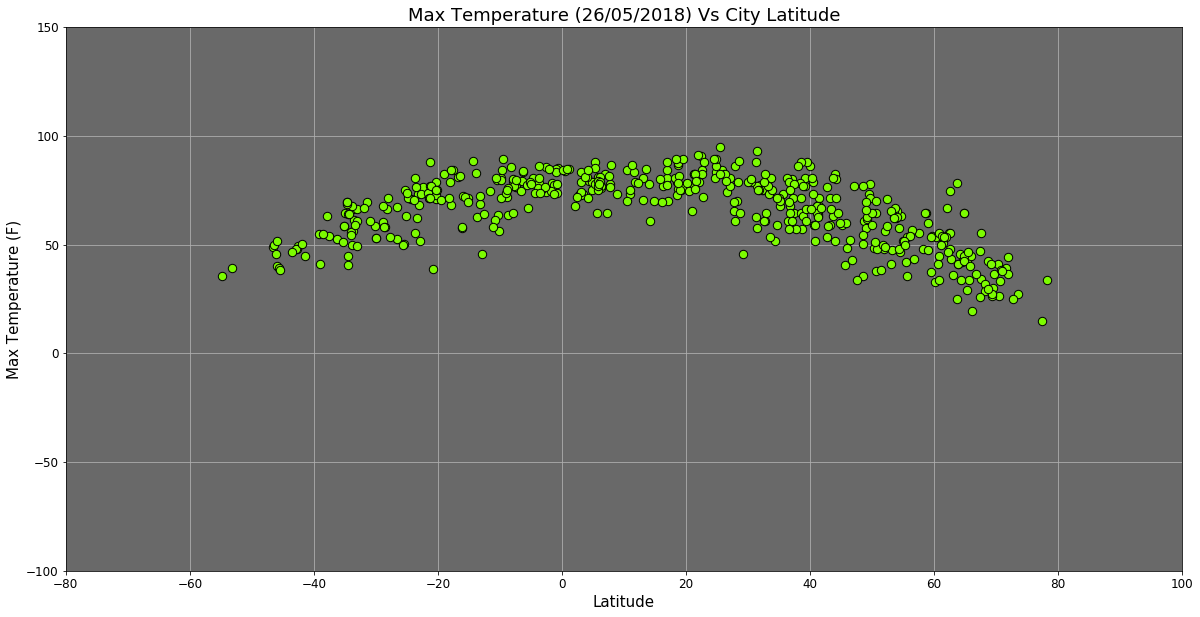

In [8]:
plt.rcParams['axes.facecolor']='dimgrey'
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 15
plt.figure(figsize=(20,10))
plt.title(f"Max Temperature ({now}) Vs City Latitude")
plt.scatter(weather_data["Latitude"],weather_data["Temperature"],edgecolors="black",color="lawngreen",s=70)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-80,100)
plt.ylim(-100,150)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("TempVsLat.png")
plt.show()

### Humidity - Latitude Plot

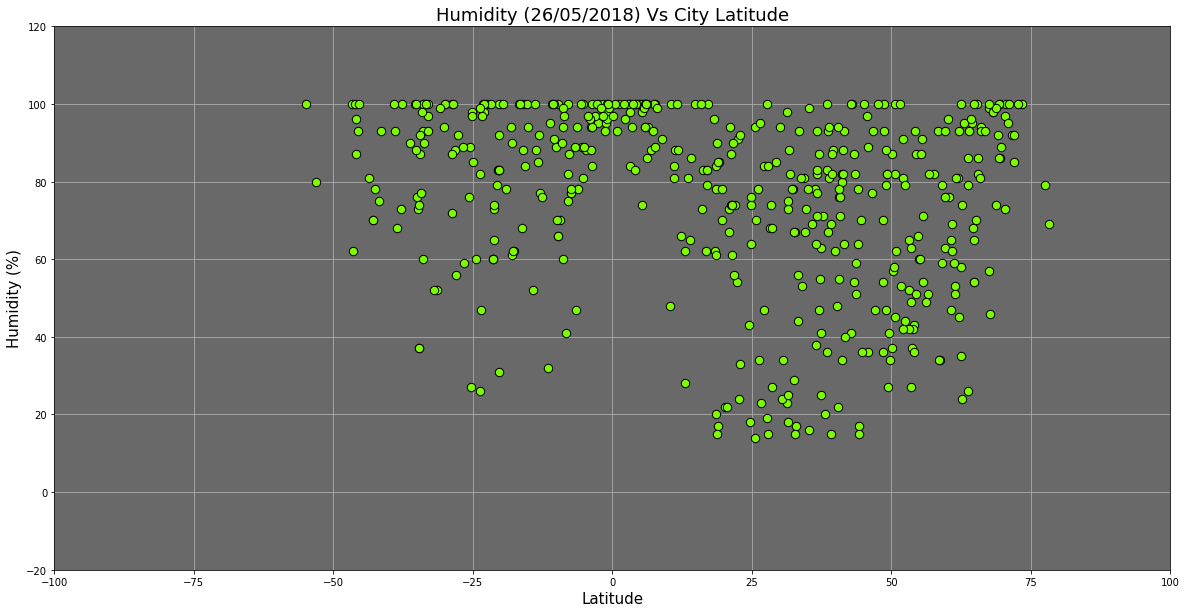

In [9]:
plt.figure(figsize=(20,10))
plt.scatter(weather_data["Latitude"],weather_data["Humidity"],edgecolors="black",color="lawngreen",s=70)
plt.title(f"Humidity ({now}) Vs City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.xlim(-100,100)
plt.ylim(-20,120)
plt.savefig("HumidityVsLat.png")
plt.show()

### Cloudiness - Latitude Plot

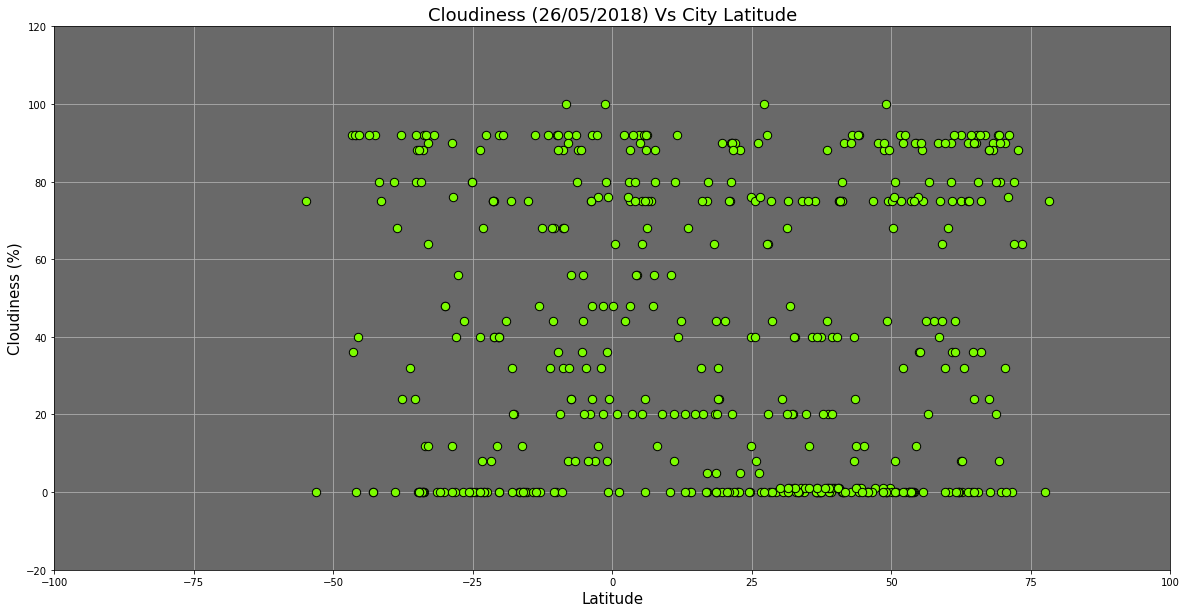

In [10]:
plt.figure(figsize=(20,10))
plt.scatter(weather_data["Latitude"],weather_data["Cloudiness"],edgecolors="black",color="lawngreen",s=70)
plt.title(f"Cloudiness ({now}) Vs City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-100,100)
plt.ylim(-20,120)
plt.grid()
plt.savefig("CloudsVsLat.png")
plt.show()

### Wind Speed - Latitude Plot

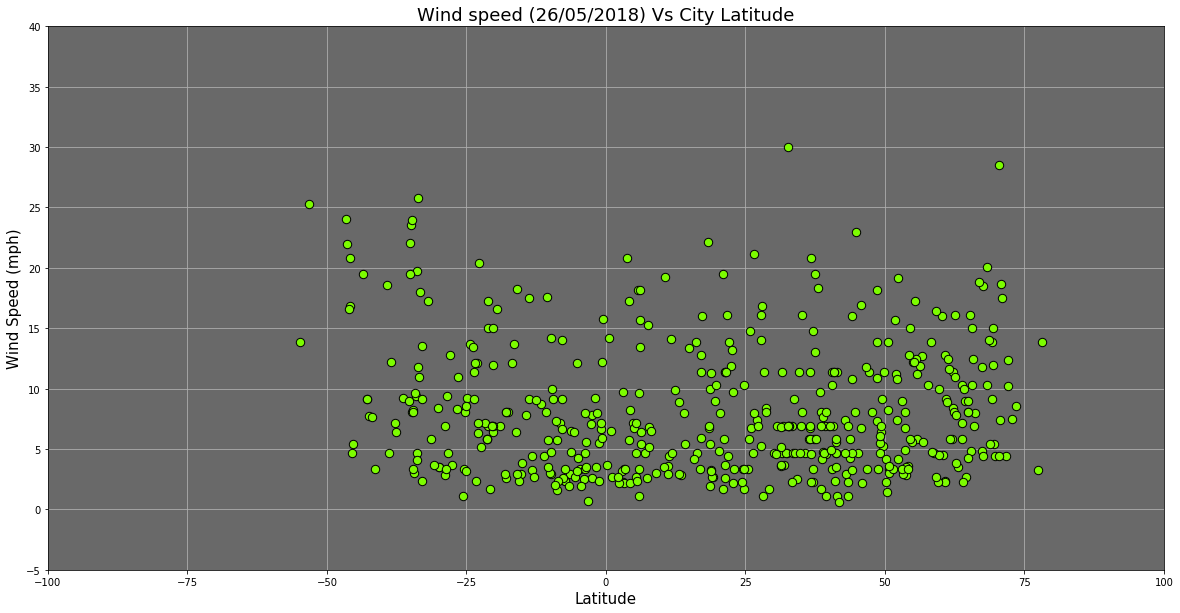

In [11]:
plt.figure(figsize=(20,10))
plt.scatter(weather_data["Latitude"],weather_data["WindSpeed"],edgecolors="black",color="lawngreen",s=70)
plt.title(f"Wind speed ({now}) Vs City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-100,100)
plt.ylim(-5,40)
plt.grid()
plt.savefig("WindspeedVsLat.png")
plt.show()

Do the random co-ordinates generated by citipy represent a uniform distribution around the world or is it concentrated in a certain part?
Let's find out by plotting the co-ordinates.  
Depending on how the graph looks and what cities are picked, it should give us a pretty good idea, right?

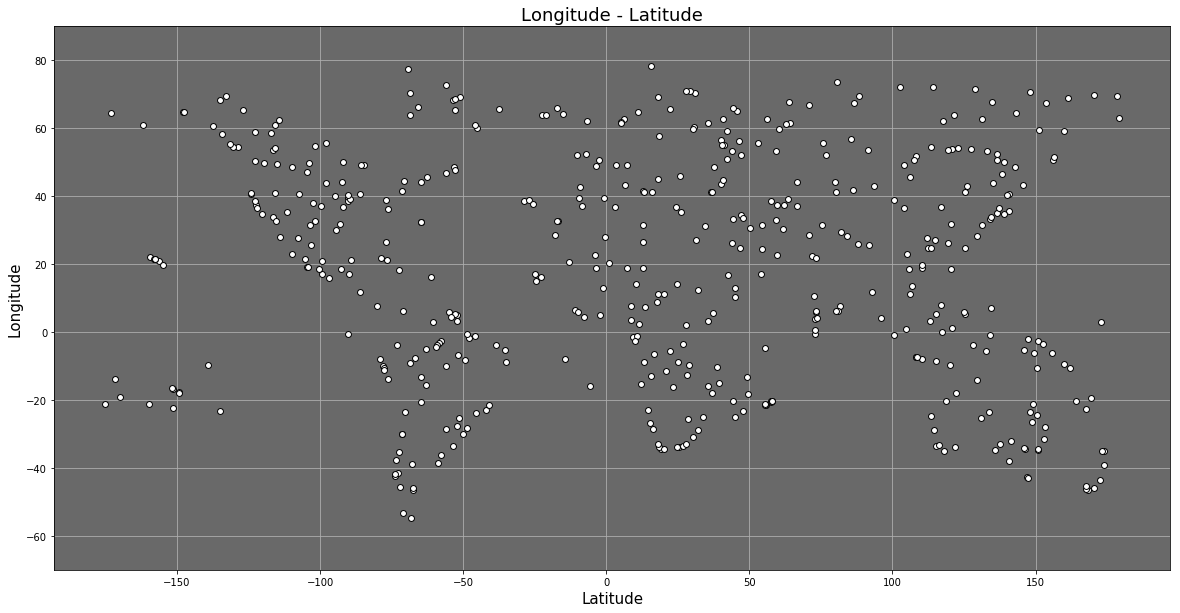

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(weather_data["Longitude"],weather_data["Latitude"],edgecolors="black",color="white",s=35)
plt.title("Longitude - Latitude")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.ylim(-70,90)
plt.grid()
plt.savefig("LongVsLat.png")
plt.show()